# Data exploration on debates/interpellations

The interpellations are questions one member of parlament asks to a member of the goverment and then they have a debate live about the question. When retreiving the data it comes as one question and the rest of the debate as answers. Therefore, it can exist multiple answers.

Made by: Elsa Kidman

In [ ]:
import json
f = open('../data/data_2018-09-09_2022-09-11/data_debates_2018-09-09_to_2022-09-11.txt')
data_init = json.load(f)

In [ ]:
data_init[1000]
#len(data_init)

{'id_': 'h810179',
 'question': 'av Jessica Thunander (V)\ntill Infrastrukturminister Tomas Eneroth (S)\n\xa0\nI Ny Teknik den 18 november i år publicerades artikeln ”Vi behöver minska trafiken för att klara klimatmålen till 2030”, undertecknad av tre trafikexperter från IVL Svenska Miljöinstitutet och Trivector. Artikeln belyser föredömligt en av flera brister i Trafikverkets inriktningsunderlag till regeringen\xa0för kommande planperiod. Man konstaterar att det saknas förslag för ett transporteffektivt samhälle som gör att tillgängligheten kan öka samtidigt som mängden trafik minskar. I stället räknar Trafikverket med att vägtrafiken fortsätter att öka enligt den så kallade\xa0basprognosen, som de presenterade tidigare i år.\nIVL konstaterar att man tidigare tagit fram ett underlag för hur en reduktionsplikt skulle kunna se ut och fungera och att det aldrig var tänkt att användas som en förevändning för att inte satsa inom andra viktiga områden. Den uteblivna satsningen på transporte

In [ ]:
empty_answers = []
empty_questions = []
short_questions = []


for entry in data_init:
  answer = entry['answer']
  question = entry['question']
  if len(answer) == 0:
    empty_answers.append(answer)
  if len(question) == 0:
    empty_questions.append(question)
  if len(question) < 250:
    short_questions.append(question)

print(f"Entries with empty answers: {len(empty_answers)}\n")

print(f"Entries with empty questions: {len(empty_questions)}\n")

print(f"Examples of \"empty\" question: \n{short_questions[0]}")

Entries with empty answers: 457

Entries with empty questions: 0

Examples of "empty" question: 
av Jonas Andersson i Linghem (SD)
till Kulturminister Jeanette Gustafsdotter (S)
 


## Amount of answers

Max nr of answers: 21


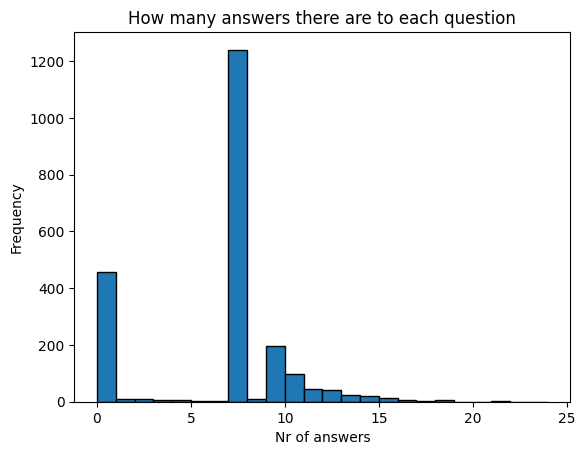

In [ ]:
import matplotlib.pyplot as plt
# Each debate have multiple answers most of the time
answers_count = []

for entry in data_init:
  answer = entry['answer']
  question = entry['question']
  answers_count.append(len(answer))

print(f"Max nr of answers: {max(answers_count)}")
plt.hist(answers_count,bins=range(0,25,1), edgecolor='black')
plt.title('How many answers there are to each question')
plt.xlabel('Nr of answers')
plt.ylabel('Frequency')
plt.show()

## Word count

In [ ]:
from nltk.stem import SnowballStemmer
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Download NLTK stopwords data
nltk.download('stopwords')
nltk.download('punkt')

# A function to remove to/from formalia from each question.
def remove_names(question):

    ## Remove the first two lines
    lines = question.split('\n')[2:]
    result = '\n'.join(lines)

    return result

# Remove swedish Stop Words
def remove_stopwords(text):

    stopword_custom = stopwords.words('swedish')
    stop_list = ["ska", "ske", "det", "vore", "samt"] # "se", "ge"
    stopword_custom.extend(stop_list)
    stop_words = set(stopword_custom)
    result = [word for word in text if word not in stop_words]
    return result

# Apply stemming for swedish
def stemming(text):

    stemmer = SnowballStemmer("swedish")
    resuling_text = [stemmer.stem(plural) for plural in text]
    return resuling_text

# Filters out all special characters, punktation etc. Only letters and numers left
def filter_bad_characters(tokens):

    # Regular expression can be used only get tokens containing letters and  numbers. Unicode is needed for å,ä,ö
    cleaned_tokens = [token for token in tokens if re.match(r'^[\wåäö]+$', token, flags=re.UNICODE)]
    return cleaned_tokens

def preprocess(text):

    # Tokenize the text
    words = word_tokenize(text, language='swedish')
    # Lowercase
    lowercase_words = [word.lower() for word in words]

    # Remove stop words
    stop_words_removed = remove_stopwords(lowercase_words)

    # Remove special characters and punktation
    cleaned_tokens = filter_bad_characters(stop_words_removed)

    #Apply stemming
    filtered_words = cleaned_tokens#stemming(cleaned_tokens)

    # contains the preprocessed tokens.
    return filtered_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
questions = []
answers = []
for entry in data_init:
  question = entry['question']
  answer_lst = entry['answer']

  questions.append(question)

  tmp = []
  for entry_answer in answer_lst:
    tmp.append(entry_answer['answer'])
  answers.append(tmp)

In [ ]:
answers[1000]

['Anf.\xa0\xa099\xa0\xa0Infrastrukturminister TOMAS ENEROTH\xa0(S):Svar på interpellationerHerr talman! Jessica Thunander har frågat mig om jag avser att ge Trafikverket i uppdrag att utarbeta ett reviderat inriktningsunderlag.Just nu genomförs regeringens gällande plan för transportinfrastrukturen. Det är en satsning på över 700 miljarder kronor som bland annat innebär den största järnvägssatsningen i modern tid. Det gör vi för att öka tillgängligheten, modernisera svensk infrastruktur och öka möjligheterna för klimatsmarta transporter. Planen bidrar till Sveriges mycket ambitiösa klimatpolitik. Sverige ska bli världens första fossilfria välfärdsland. De klimatmål som är uppsatta ska nås.Regeringen genomför en stor mängd åtgärder för att minska utsläppen från transportsektorn. Det handlar om att göra Sverige till ett mer trans\xadporteffektivt samhälle med överflyttning av transporter till mer klimat\xadeffektiva transportsätt. Det handlar också om att snabba på elektrifieringen i sam

In [ ]:
questions_tokenized = []
questions_len = []

answers_tokenized = []
answers_len = []

questions_tokenized_updated = []
questions_len_updated = []

answers_tokenized_updated = []
answers_len_updated = []

for question, answer in zip(questions, answers):

  # Tokenize and lowercase the text
  words_question = word_tokenize(question, language='swedish')
  words_question = [word.lower() for word in words_question]
  questions_tokenized.append(words_question)

  # question length
  questions_len.append(len(words_question))

  # Preprocessed data
  question_preproc = preprocess(question)
  questions_tokenized_updated.append(question_preproc)
  questions_len_updated.append(len(question_preproc))

  answer_len = []
  answer_tok = []
  answer_tok_pre = []
  answer_len_pre = []
  for entry_answer in answer:
    # Tokenize and lowercase the text
    words_answer = word_tokenize(entry_answer, language='swedish')
    words_answer = [word.lower() for word in words_answer]

    answer_tok.append(words_answer)
    answer_len.append(len(words_answer))
    # Preprocessed data
    answer_preproc = preprocess(entry_answer)
    answer_tok_pre.append(answer_preproc)
    answer_len_pre.append(len(answer_preproc))


  answers_tokenized.append(answer_tok)
  answers_len.append(answer_len)


  answers_tokenized_updated.append(answer_tok_pre)
  answers_len_updated.append(answer_len_pre)

In [ ]:
max(questions_len)

1957

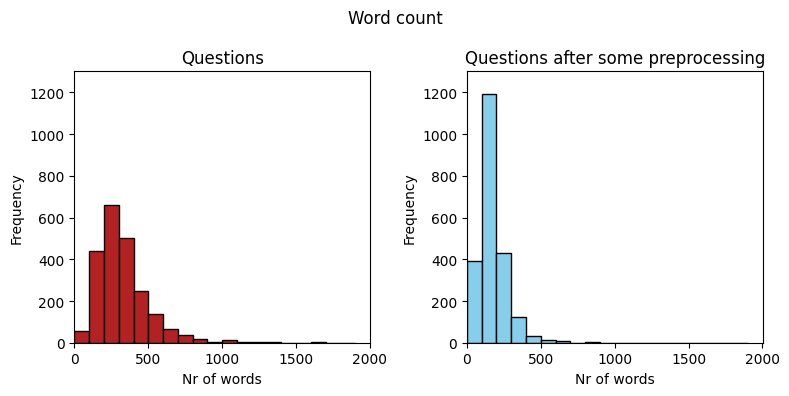

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(8, 4))


axs[0].hist(questions_len, bins=range(0, 2000, 100), color='firebrick', edgecolor='black')
axs[0].set_title('Questions')
axs[0].set_xlim(0, 2001)
axs[0].set_ylim(0, 1301)
axs[0].set_xlabel('Nr of words')
axs[0].set_ylabel('Frequency')

axs[1].hist(questions_len_updated, bins=range(0, 2000, 100), color='skyblue', edgecolor='black')
axs[1].set_title('Questions after some preprocessing')
axs[1].set_xlim(0, 2001)
axs[1].set_ylim(0, 1301)
axs[1].set_xlabel('Nr of words')
axs[1].set_ylabel('Frequency')

fig.suptitle('Word count')
plt.tight_layout()
plt.show()


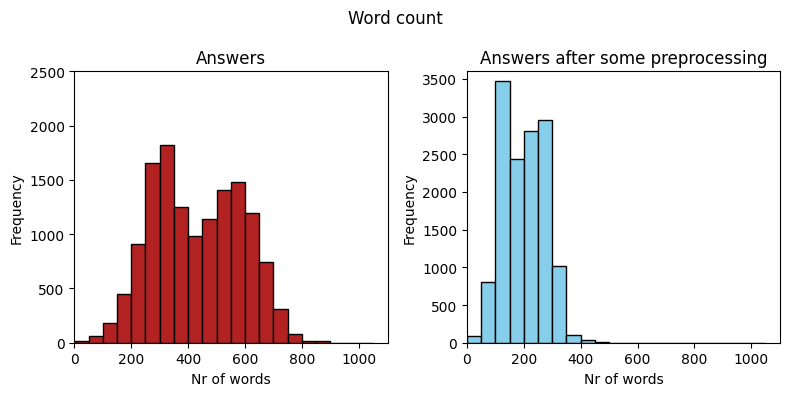

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

flattened_a_len = [item for sublist in answers_len for item in sublist]
flattened_a_len_preproc = [item for sublist in answers_len_updated for item in sublist]

axs[0].hist(flattened_a_len, bins=range(0, 1100, 50), color='firebrick', edgecolor='black')
axs[0].set_title('Answers')
axs[0].set_xlim(0, 1101)
axs[0].set_ylim(0, 2501)
axs[0].set_xlabel('Nr of words')
axs[0].set_ylabel('Frequency')

axs[1].hist(flattened_a_len_preproc, bins=range(0, 1100, 50), color='skyblue', edgecolor='black')
axs[1].set_title('Answers after some preprocessing')
axs[1].set_xlim(0, 1101)
axs[1].set_ylim(0, 3601)
axs[1].set_xlabel('Nr of words')
axs[1].set_ylabel('Frequency')

fig.suptitle('Word count')
plt.tight_layout()
plt.show()


In [ ]:
questions = []
answers_party_len = []

parties_questions_len = {'S':[], 'V':[], 'MP':[], 'C':[], 'L':[], 'M':[], 'KD':[], 'SD':[], '-':[]}
parties_answers_len = {'S':[], 'V':[], 'MP':[], 'C':[], 'L':[], 'M':[], 'KD':[], 'SD':[], '-':[]}

for entry in data_init:
  question = entry['question']
  answer_lst = entry['answer']
  party_question = entry['undertecknare_partibet']

  # Tokenize and Lowercase the text
  words_question = word_tokenize(question, language='swedish')
  words_question = [word.lower() for word in words_question]

  parties_questions_len[party_question].append(len(words_question))

  for entry_answer in answer_lst:
    party_answer = entry['besvaradav_partibet']

    answer = entry_answer['answer']
    words_answer = word_tokenize(answer, language='swedish')
    words_answer = [word.lower() for word in words_answer]

    parties_answers_len[party_answer].append(len(words_answer))

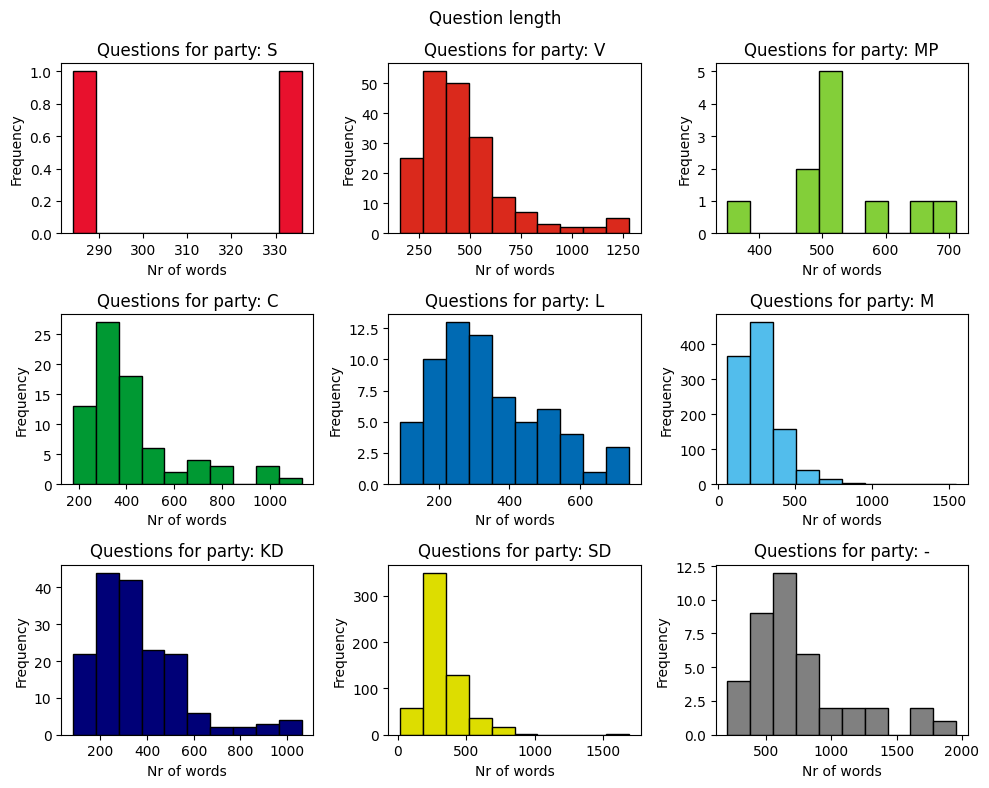

In [ ]:
party_color = {'S':"#E8112d", 'V':"#DA291C", 'MP':"#83CF39", 'C':"#009933", 'L': "#006AB3", 'M':"#52BDEC", 'KD':"#000077", 'SD': "#DDDD00", '-': "gray"}

fig, axs = plt.subplots(3, 3, figsize=(10, 8))
axs = axs.flatten()

for i, (key, value) in enumerate(parties_questions_len.items()):

  axs[i].hist(value, edgecolor='black', color=party_color[key])
  axs[i].set_title(f'Questions for party: {key}')
  # axs[i].set_xlim(0, 1401)
  # axs[i].set_ylim(0, 501)
  axs[i].set_xlabel('Nr of words')
  axs[i].set_ylabel('Frequency')


fig.suptitle('Question length')
plt.tight_layout()
plt.show()

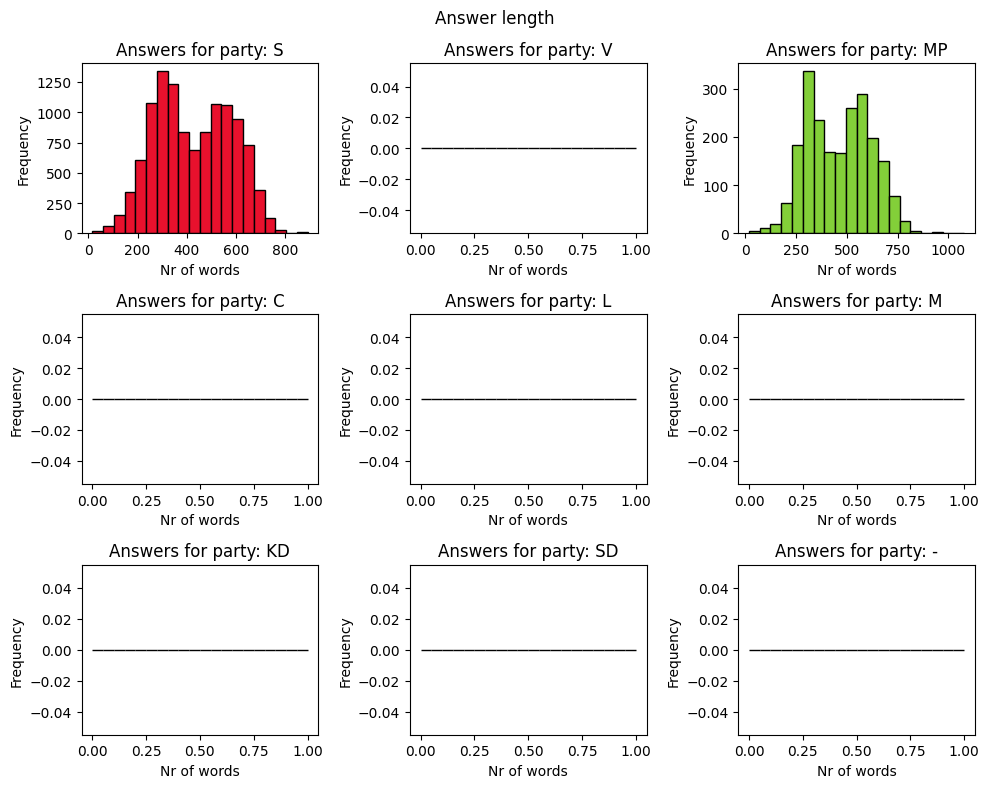

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(10, 8))
axs = axs.flatten()

for i, (key, value) in enumerate(parties_answers_len.items()):

  axs[i].hist(value, bins=20, edgecolor='black', color=party_color[key])
  axs[i].set_title(f'Answers for party: {key}')
  # axs[i].set_xlim(0, 1401)
  # axs[i].set_ylim(0, 2001)
  axs[i].set_xlabel('Nr of words')
  axs[i].set_ylabel('Frequency')


fig.suptitle('Answer length')
plt.tight_layout()
plt.show()

In [ ]:
s